In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('..\\datasets\\Credit-Score-Data\\train.csv')
# dataset url https://statso.io/credit-score-classification-case-study/

In [3]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [4]:
data.info()#check columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
data.isnull().any() # check if there is any null value

ID                          False
Customer_ID                 False
Month                       False
Name                        False
Age                         False
SSN                         False
Occupation                  False
Annual_Income               False
Monthly_Inhand_Salary       False
Num_Bank_Accounts           False
Num_Credit_Card             False
Interest_Rate               False
Num_of_Loan                 False
Type_of_Loan                False
Delay_from_due_date         False
Num_of_Delayed_Payment      False
Changed_Credit_Limit        False
Num_Credit_Inquiries        False
Credit_Mix                  False
Outstanding_Debt            False
Credit_Utilization_Ratio    False
Credit_History_Age          False
Payment_of_Min_Amount       False
Total_EMI_per_month         False
Amount_invested_monthly     False
Payment_Behaviour           False
Monthly_Balance             False
Credit_Score                False
dtype: bool

<Axes: ylabel='count'>

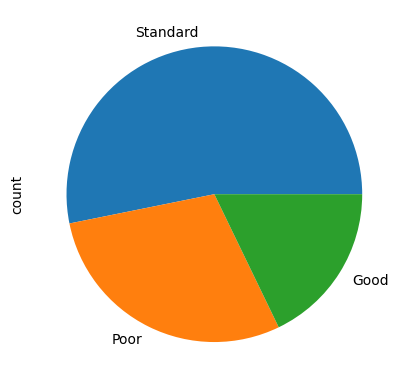

In [6]:
data['Credit_Score'].value_counts().plot(kind='pie')

<Axes: xlabel='Credit_Score', ylabel='Annual_Income'>

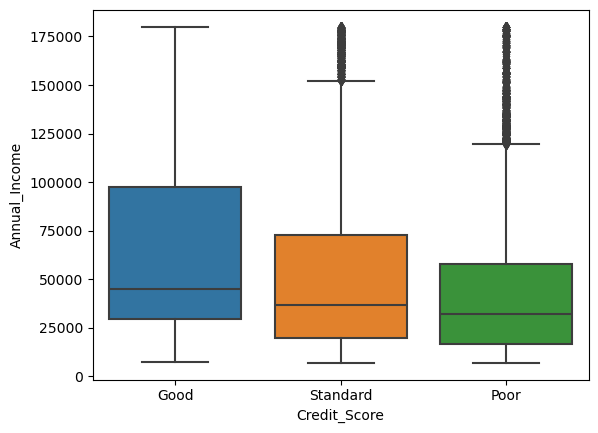

In [7]:
sns.boxplot(data,x='Credit_Score',y='Annual_Income')

In [8]:
data['Credit_Mix']=data['Credit_Mix'].map({'Standard':1,'Good':2,'Bad':0})
data['Credit_Score']=data['Credit_Score'].map({'Standard':1,'Good':2,'Poor':0})

In [9]:
from sklearn.model_selection import train_test_split
x = np.array(data[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])
y = np.array(data[["Credit_Score"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [10]:
model.score(xtest,ytest)

0.8074848484848485

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [15]:
ypred=model.predict(xtest)

In [16]:
cm=confusion_matrix(ytest,ypred,labels=[0,1,2])

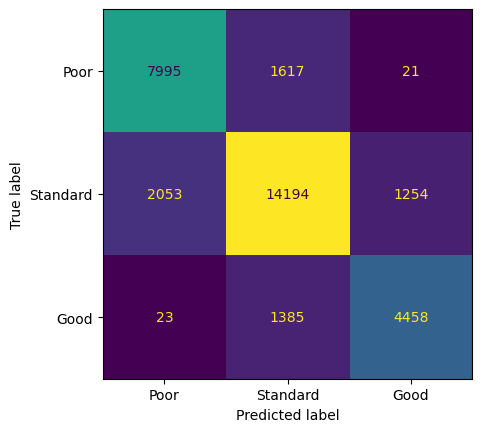

In [17]:
cmd=ConfusionMatrixDisplay(cm,display_labels=['Poor','Standard','Good'])
cmd.plot(colorbar=False)

Steps Involved in Random Forest Algorithm

Step 1: In the Random forest model, a subset of data points and a subset of features is selected for constructing each decision tree. Simply put, n random records and m features are taken from the data set having k number of records.

Step 2: Individual decision trees are constructed for each sample.

Step 3: Each decision tree will generate an output.

Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression, respectively.

In [18]:
from xgboost import XGBClassifier

In [59]:
model2=XGBClassifier(colsample_bytree= 0.7785, gamma= 0.006899, 
learning_rate= 0.336, max_depth= 18, min_child_weight= 4, 
n_estimators= 162,subsample= 0.6)
#model2=XGBClassifier()

In [60]:
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.7905757575757576

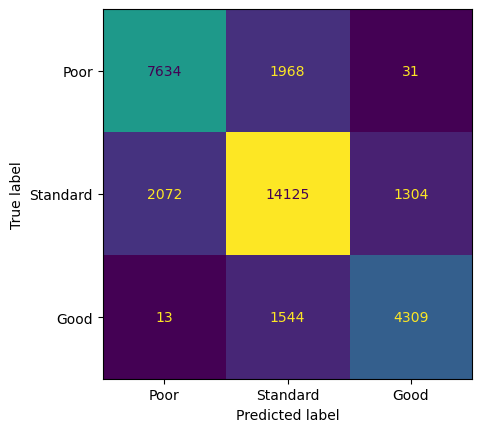

In [56]:
ypred2=model2.predict(xtest)
cm=confusion_matrix(ytest,ypred2,labels=[0,1,2])
cmd=ConfusionMatrixDisplay(cm,display_labels=['Poor','Standard','Good'])
cmd.plot(colorbar=False)

In [50]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={
    'n_estimators': hp.uniform('n_estimators', 50, 200),
    'max_depth': hp.quniform("max_depth", 2, 18, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, -1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'gamma': hp.uniform ('gamma', 0,10),
    #'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
    #'reg_lambda' : hp.uniform('reg_lambda', 0,1),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
}

In [61]:
def objective(space):
    model=XGBClassifier(
        n_estimators =int(space['n_estimators']),
        max_depth = int(space['max_depth']),
        learning_rate=space['learning_rate'],
        subsample=space['subsample'],
        gamma = space['gamma'],
        #reg_alpha = int(space['reg_alpha']),
        colsample_bytree=int(space['colsample_bytree']),
        min_child_weight=int(space['min_child_weight']),
    )
    
    #evaluation = [( xtrain, ytrain), ( xtest, ytest)]
    
    model.fit(xtrain, ytrain)
    #ypred = model.predict(xtest)
    
    accuracy = model.score(xtest,ytest)
    print ("SCORE:%f"% accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin( objective,space,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials=trials
                       )

In [53]:
print(best_hyperparams)

{'colsample_bytree': 0.7785026217097253, 'gamma': 0.0068994986194199255, 'learning_rate': 0.33602769130661886, 'max_depth': 18.0, 'min_child_weight': 4.0, 'n_estimators': 162.88523209100276, 'subsample': 0.6029219160044837}
